In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch

from sklearn import cluster

**Данные первого датасета**

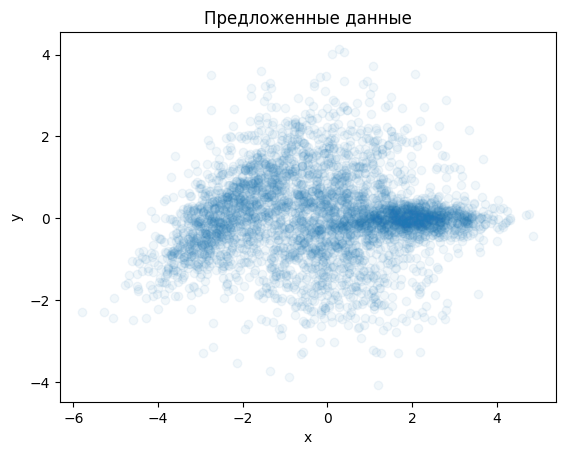

In [59]:

# Загрузка данных из файла
data = torch.load('/content/drive/MyDrive/data/EM_test_data.pt')

# Разделение данных на координаты x и y
x = data[:, 0]
y = data[:, 1]

# Построение графика точек
plt.scatter(x, y, alpha = 0.06)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Предложенные данные')
plt.show()


**Работа KMeans на 1 датасете**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


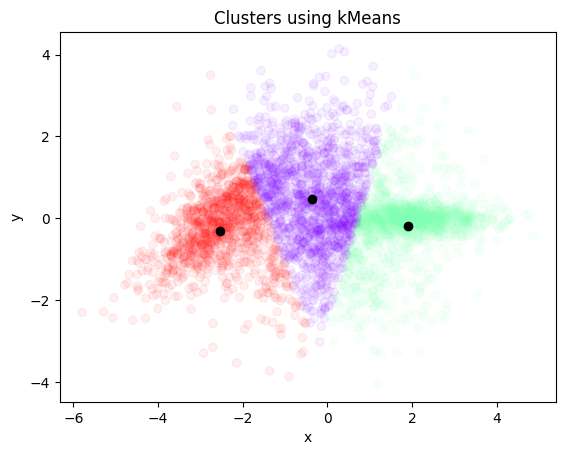

In [65]:
# Преобразование данных в numpy массив
data_np = data.numpy()

# Количество кластеров
n_clusters = 3

# Создание и обучение модели kMeans
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state = 30)
kmeans.fit(data_np)

# Получение меток кластеров
labels = kmeans.labels_
centre = kmeans.cluster_centers_

# Построение графика точек с цветовой разметкой по кластерам
plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='rainbow', alpha = 0.06)
plt.scatter(centre[:, 0], centre[:, 1], c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters using kMeans')
plt.show()


**Работа KMeans на 'хороших' данных**

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

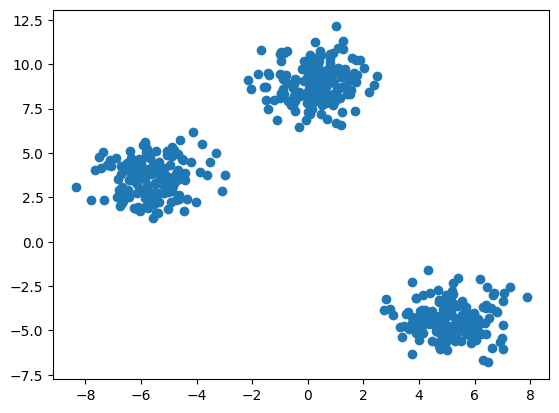

In [67]:
X,Y_blobs = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
# plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

**В реализации em-алгоритма нам придется инициализировать начальные значения при помощи реализации KMeans из sclearn**

In [68]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
	points = []
	cluster_dict = {
		'center' : center,
		'points' : []
	}

	clusters[idx] = cluster_dict

clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

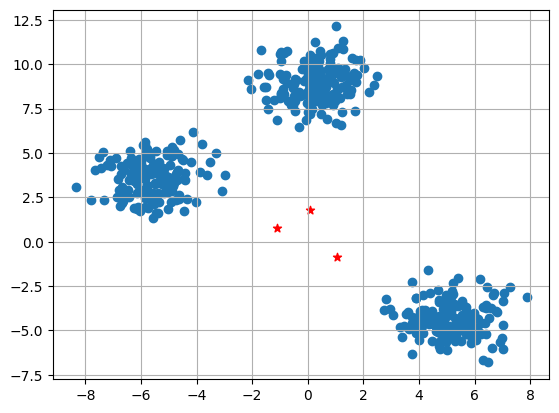

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


Реализуем функцию которая показывает итерации алгоритма KMeans

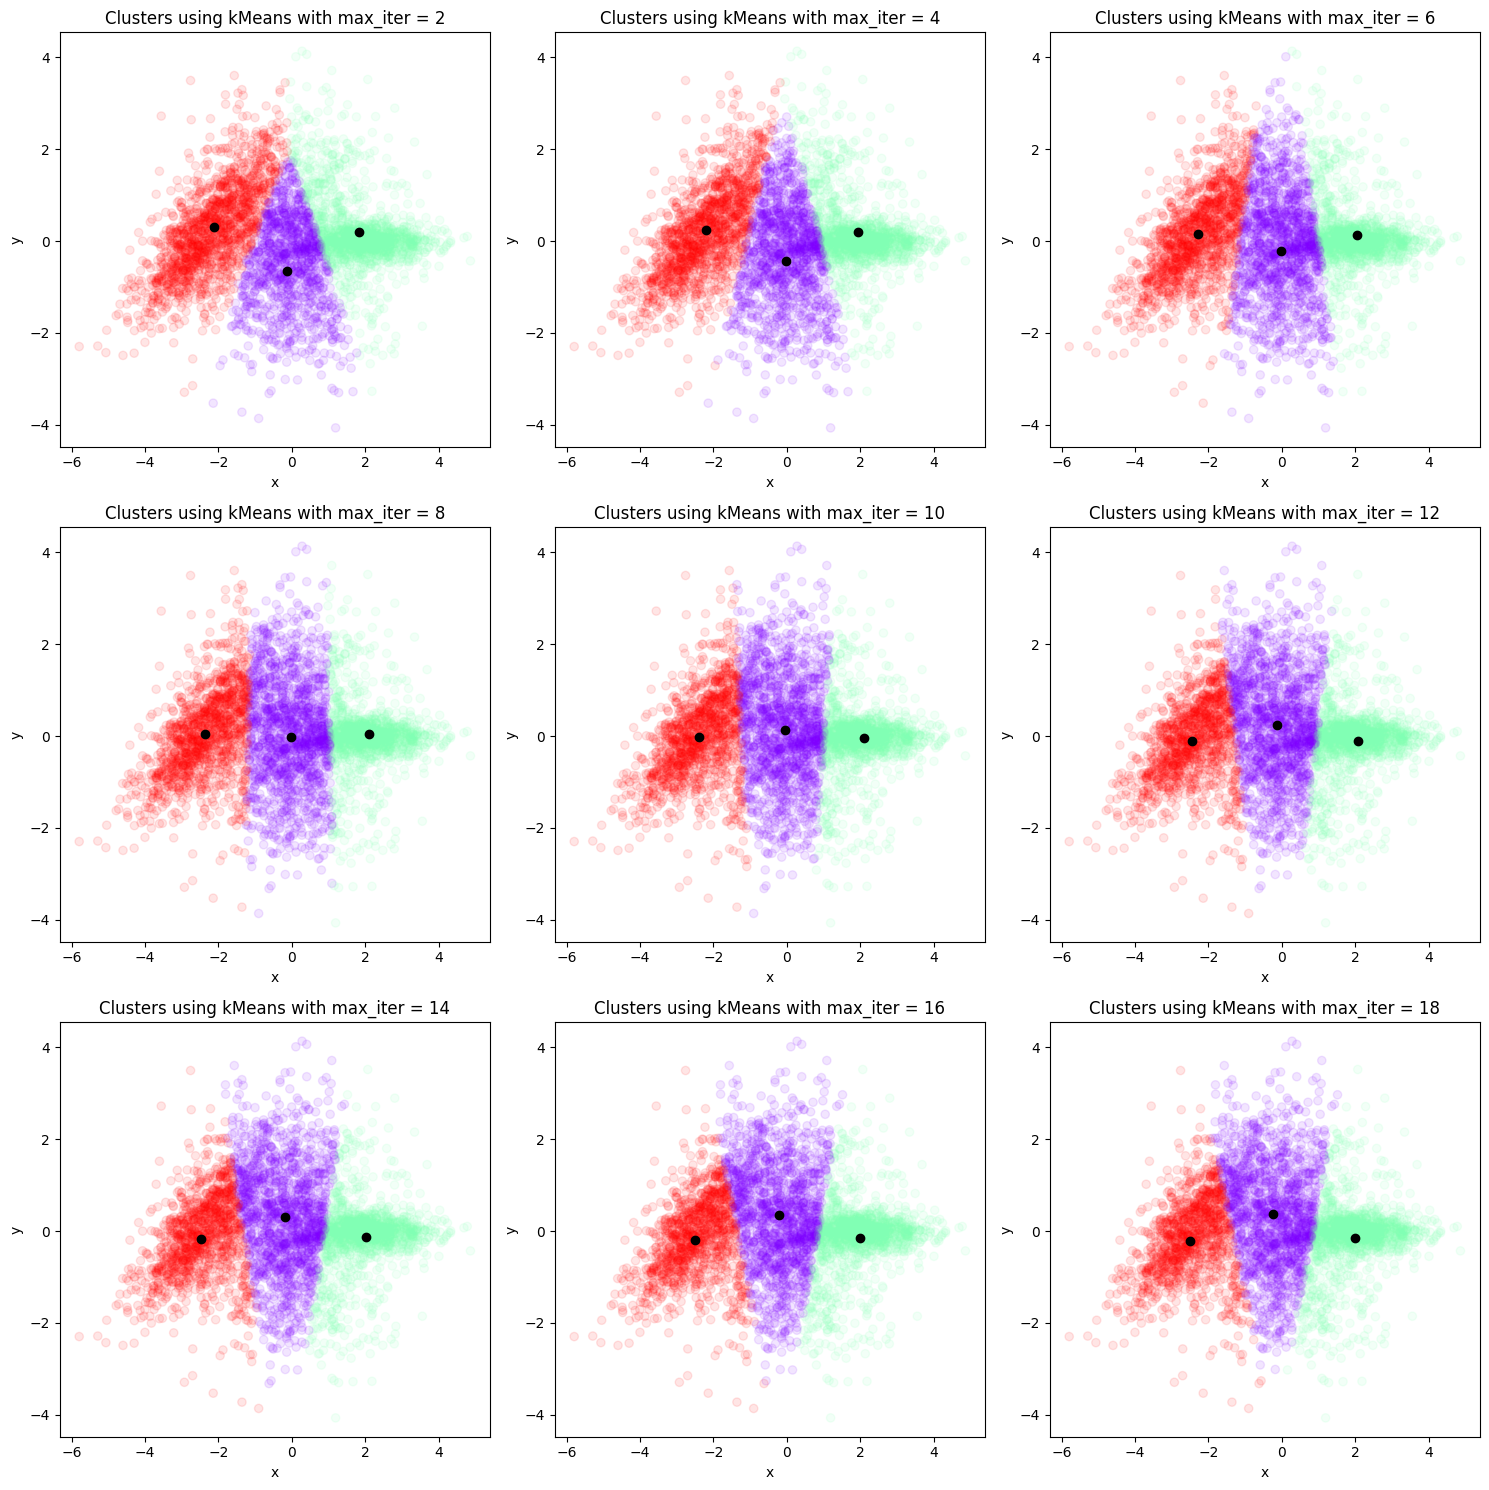

In [ ]:
def plot_cluster(data, iter, n):
    data_np = data.numpy()

    # Количество кластеров
    n_clusters = n
    # Создание и обучение модели kMeans с заданным количеством итераций
    kmeans = cluster.KMeans(n_clusters=n_clusters, n_init = 1, max_iter = iter * 2, tol = 10e-6, random_state=30)
    kmeans.fit(data_np)

    # Получение меток кластеров
    labels = kmeans.labels_
    centre = kmeans.cluster_centers_
    # Добавление subplot'а для текущего графика
    plt.subplot(3, 3, iter)
    plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='rainbow', alpha=0.1)
    plt.scatter(centre[:, 0], centre[:, 1], c = 'black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Clusters using kMeans with max_iter = {}'.format(iter * 2))

# Создание общего графика с 3x3 subplot'ами
n_clusters = 3
plt.figure(figsize=(15, 15))
for i in range(1, 10):
    plot_cluster(data, i, n_clusters)

plt.tight_layout()
plt.show()

**Видно что кластеры разделяются четкой прямой, посмотрим случай разделения на 5 кластеров**

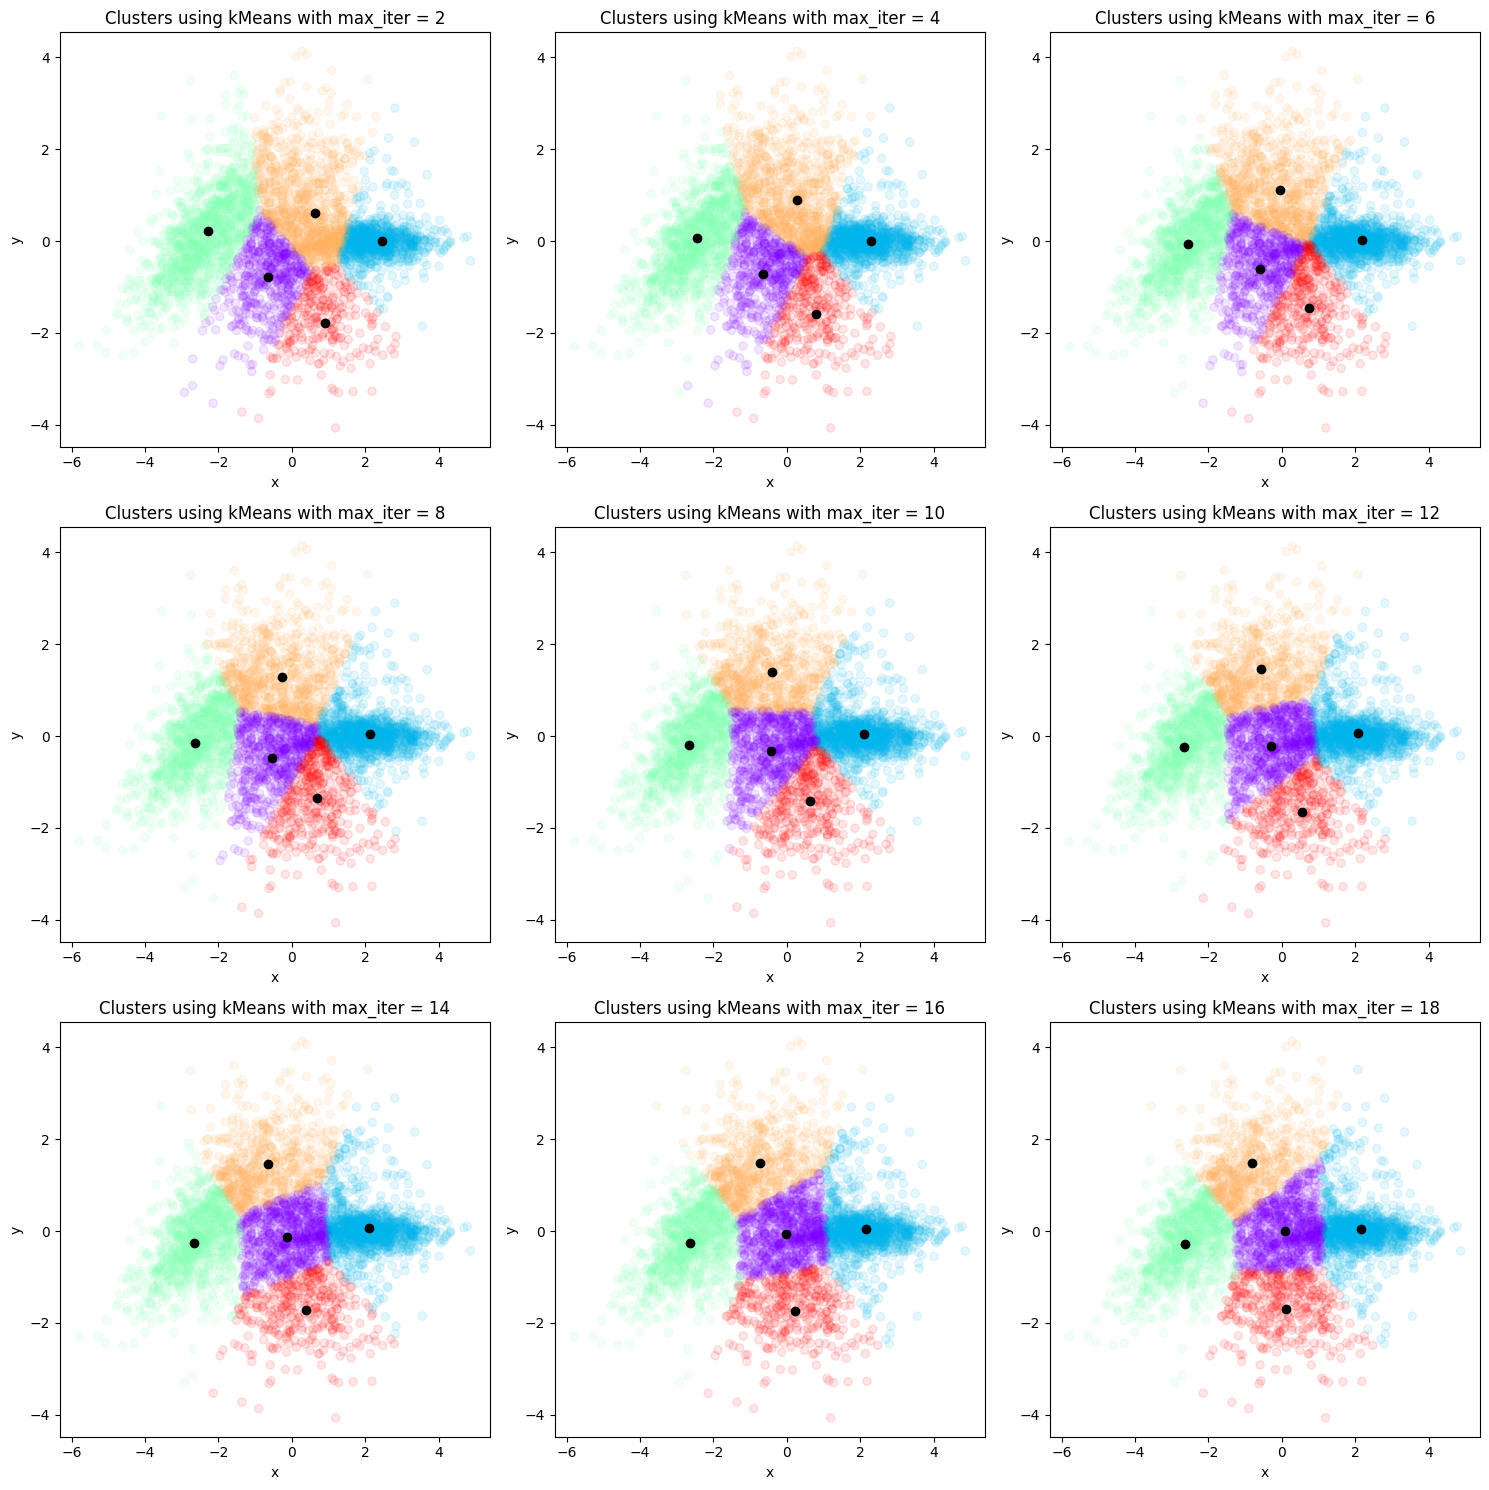

In [ ]:
# Создание общего графика с 3x3 subplot'ами
n_clusters = 5
plt.figure(figsize=(15, 15))
for i in range(1, 10):
    plot_cluster(data, i, n_clusters)

plt.tight_layout()
plt.show()

**Прямые, ожидаемо, все ярко выражены**

Кластеризируем наши выше определенные 'хорошие' данные

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


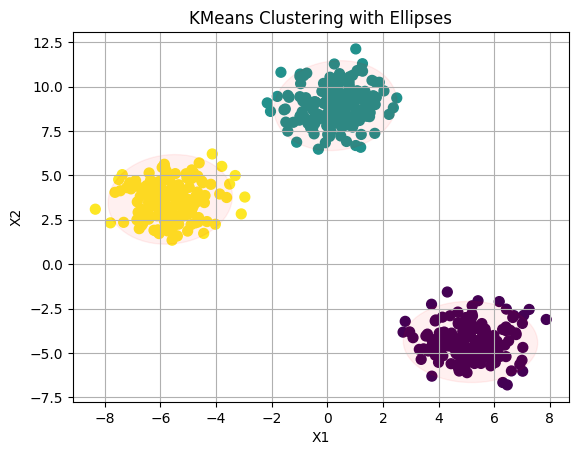

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse


# Обучение алгоритма KMeans на сгенерированных точках
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.labels_

# Визуализация точек и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
for i, cluster_center in enumerate(centers):
    covariance_matrix = np.cov(X[y_kmeans==i].T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * 180 / np.pi
    width, height = 2 * np.sqrt(5.991 * eigenvalues)  # 95% confidence interval (chi-squared distribution)
    ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=0.06, color='red')
    plt.gca().add_patch(ellipse)

plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.title('KMeans Clustering with Ellipses')
plt.show()

**Нарисуем KMeans и элипсы, описывающие их (изолинии)**

In [ ]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_cluster_elipse(data, iter, n, X, lr):
    data_np = data.numpy()
    n_clusters = n
    kmeans = cluster.KMeans(n_clusters=n_clusters, n_init = 1, max_iter = iter * 5, tol = lr, random_state=42)
    kmeans_before = cluster.KMeans(n_clusters=n_clusters, n_init = 1, max_iter = iter * 5, tol = lr, random_state=42)
    kmeans_before.fit(data_np)
    centre_before = kmeans_before.cluster_centers_

    kmeans.fit(data_np)

    labels = kmeans.labels_
    centre = kmeans.cluster_centers_

    colors = ['purple', 'red', 'green']

    plt.subplot(3, 3, iter)
    plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='rainbow', alpha=0.08)
    plt.scatter(centre[:, 0], centre[:, 1], c = 'black', alpha = 0.4)

    plt.scatter(centre_before[:, 0], centre_before[:, 1], c = 'black', alpha = 0.4)

    y_kmeans = labels

    centers = kmeans.cluster_centers_
    for i, cluster_center in enumerate(centers):
        plt.scatter(cluster_center[0], cluster_center[1], c='black', marker='x', s=100)
        covariance_matrix = np.cov(X[y_kmeans==i].T)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * 180 / np.pi
        width, height = 2 * np.sqrt(5.991 * eigenvalues)  # 95% confidence interval (chi-squared distribution)
        ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=0.5, edgecolor='black', facecolor='none')
        plt.gca().add_patch(ellipse)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Clusters using kMeans with max_iter = {}'.format(iter * 5))

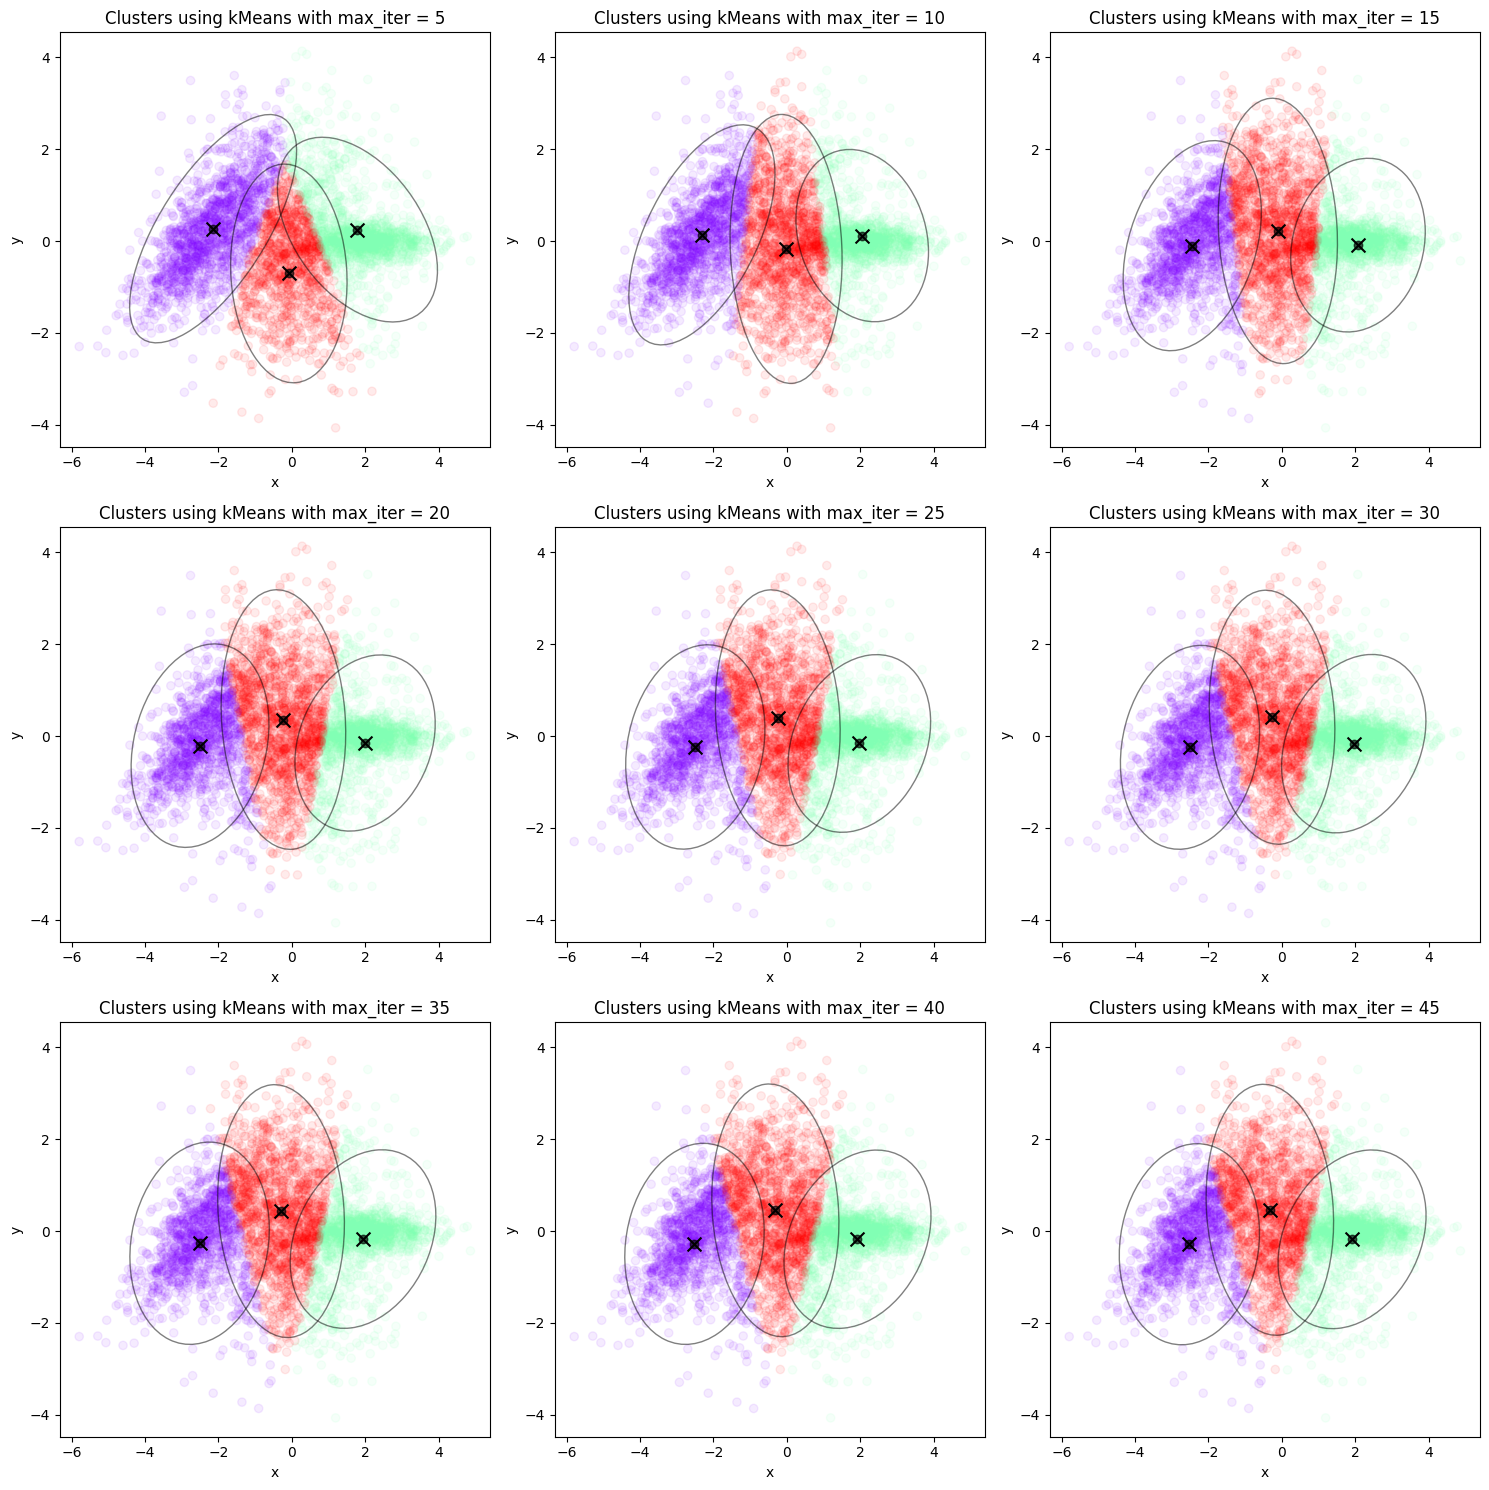

In [ ]:
# Создание общего графика с 3x3 subplot'ами
n_clusters = 3
plt.figure(figsize=(15, 15))
for i in range(1, 10):
    plot_cluster_elipse(data, i, n_clusters, np.hstack([x.reshape(-1, 1).numpy(), y.reshape(-1, 1)],), lr = 0.0000001)

plt.tight_layout()
plt.show()

#EM-алгоритм

Формула нормального распределения:

In [ ]:
def f(x, mu, sigma2):
    return 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-1/2 * 1/sigma2 * (x - mu)**2)

In [ ]:
X = np.concatenate((x, y))

**Функция em-алгоритм(для смеси 3 нормальных распределений):**

In [33]:
import numpy as np
from scipy.stats import multivariate_normal

def multivariate_normal_pdf(X, mean, cov):
    d = len(mean)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)

    factor = 1 / (np.sqrt((2 * np.pi)**d * det_cov))

    diff = X - mean
    exponent = np.exp(-0.5 * np.sum(diff @ inv_cov * diff, axis=1))

    return factor * exponent

def em_clustering(data, n_clusters = 3, max_iter=100, tol=1e-4):
    np.random.seed(42)
    n_samples, n_features = data.shape

    means = np.random.rand(n_clusters, n_features)
    covariances = np.array([np.eye(n_features) for _ in range(n_clusters)])
    weights = np.ones(n_clusters) / n_clusters
    for _ in range(max_iter):
        # E-step
        likelihoods = np.array([multivariate_normal_pdf(data, mean=means[i],
                                                        cov=covariances[i]) for i in range(n_clusters)]).T
        weighted_likelihoods = likelihoods * weights
        cluster_probs = weighted_likelihoods / weighted_likelihoods.sum(axis=1)[:, np.newaxis]

        # M-step
        new_means = np.dot(cluster_probs.T, data) / cluster_probs.sum(axis=0)[:, np.newaxis]
        new_covariances = np.array([np.dot((data - new_means[i]).T,
                                           np.dot(np.diag(cluster_probs[:, i]),
                                                  (data - new_means[i]))) / cluster_probs[:, i].sum() for i in range(n_clusters)])
        new_weights = cluster_probs.sum(axis=0) / n_samples

        if np.linalg.norm(new_means - means) < tol:
            break

        means = new_means
        covariances = new_covariances
        weights = new_weights

    return means, covariances, weights, np.array([multivariate_normal.pdf(data, mean=means[i], cov=covariances[i]) for i in range(n_clusters)]).T

**Протестируем код**

In [ ]:
n_clusters = 3
means, covariances, weights, like = em_clustering(data_np, n_clusters)
print("Cluster means:", means)

Cluster means: [[-0.05659937  0.04973956]
 [ 2.05127548 -0.01851383]
 [-2.48749998  0.0163244 ]]


Посчитаем вероятность принадлежности каждому классу по массиву правдоподобия

In [ ]:
classes = []
for f,s,t in like:
  if (max(max(f,s),t) == f):
    classes.append(0)
  elif (max(max(f,s),t) == s):
    classes.append(1)
  elif (max(max(f,s),t) == t):
    classes.append(2)

**Изобразим полученную кластеризацию датасета 1**

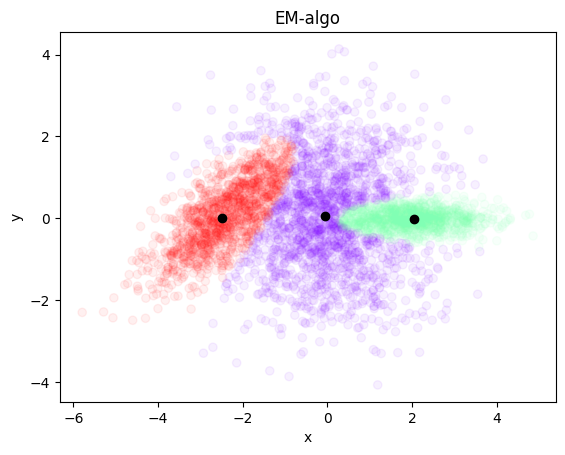

(4000, 4000)

In [ ]:
data = torch.load('/content/drive/MyDrive/data/EM_test_data.pt')

x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y, c = classes, cmap = 'rainbow', alpha = 0.06)
plt.scatter(means[:,0], means[:,1], color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('EM-algo')
plt.show()
len(classes), len(data)

**Получилось довольно хорошо! Что не может не радовать**

Алгоритм хорошо заметил красное и салатовое распределение

Результат явно лучше KMeans

Сделаем итеративный график с изолиниями

In [ ]:
def plot_em_only(data, iter, n, lr):
    X = data
    data_np = data.numpy()
    n_clusters = 3
    means, covariances, weights, like = em_clustering(data_np, n_clusters, max_iter = iter * 5, tol = lr)
    classes = []
    for f,s,t in like:
      if (max(max(f,s),t) == f):
        classes.append(0)
      elif (max(max(f,s),t) == s):
        classes.append(1)
      elif (max(max(f,s),t) == t):
        classes.append(2)

    labels = classes
    centre = means
    plt.subplot(3,3,iter)
    # plt.scatter(data[:,0], data[:,1], c=labels, cmap='Paired', alpha=0.08)
    for i, label in enumerate(labels):
      if label == 0:
        plt.scatter(data[i][0], data[i][1], c='green', alpha=0.08)
      elif label == 1:
        plt.scatter(data[i][0], data[i][1], c='orange', alpha=0.08)
      else:
        plt.scatter(data[i][0], data[i][1], c='blue', alpha=0.08)
    plt.scatter(centre[:, 0], centre[:, 1], c = 'black', alpha = 0.4)
    # plt.scatter(centre_before[:, 0], centre_before[:, 1], c = 'black', alpha = 0.4)
    y_kmeans = np.array(labels)

    centers = means
    for i, cluster_center in enumerate(centers):
        plt.scatter(cluster_center[0], cluster_center[1], c='red', marker='.', s=250, alpha = 1)
        covariance_matrix = np.cov(X[y_kmeans==i].T)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * 180 / np.pi
        width, height = 2 * np.sqrt(5.991 * eigenvalues)  # 95% confidence interval (chi-squared distribution)
        if i == 0:
          ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=1, edgecolor='red', facecolor='none',label='EM-algorithm')
        else:
          ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=1, edgecolor='red', facecolor='none')
        plt.gca().add_patch(ellipse)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Clusters using EM-algo with max_iter = {}'.format(iter * 5))
    return kmeans

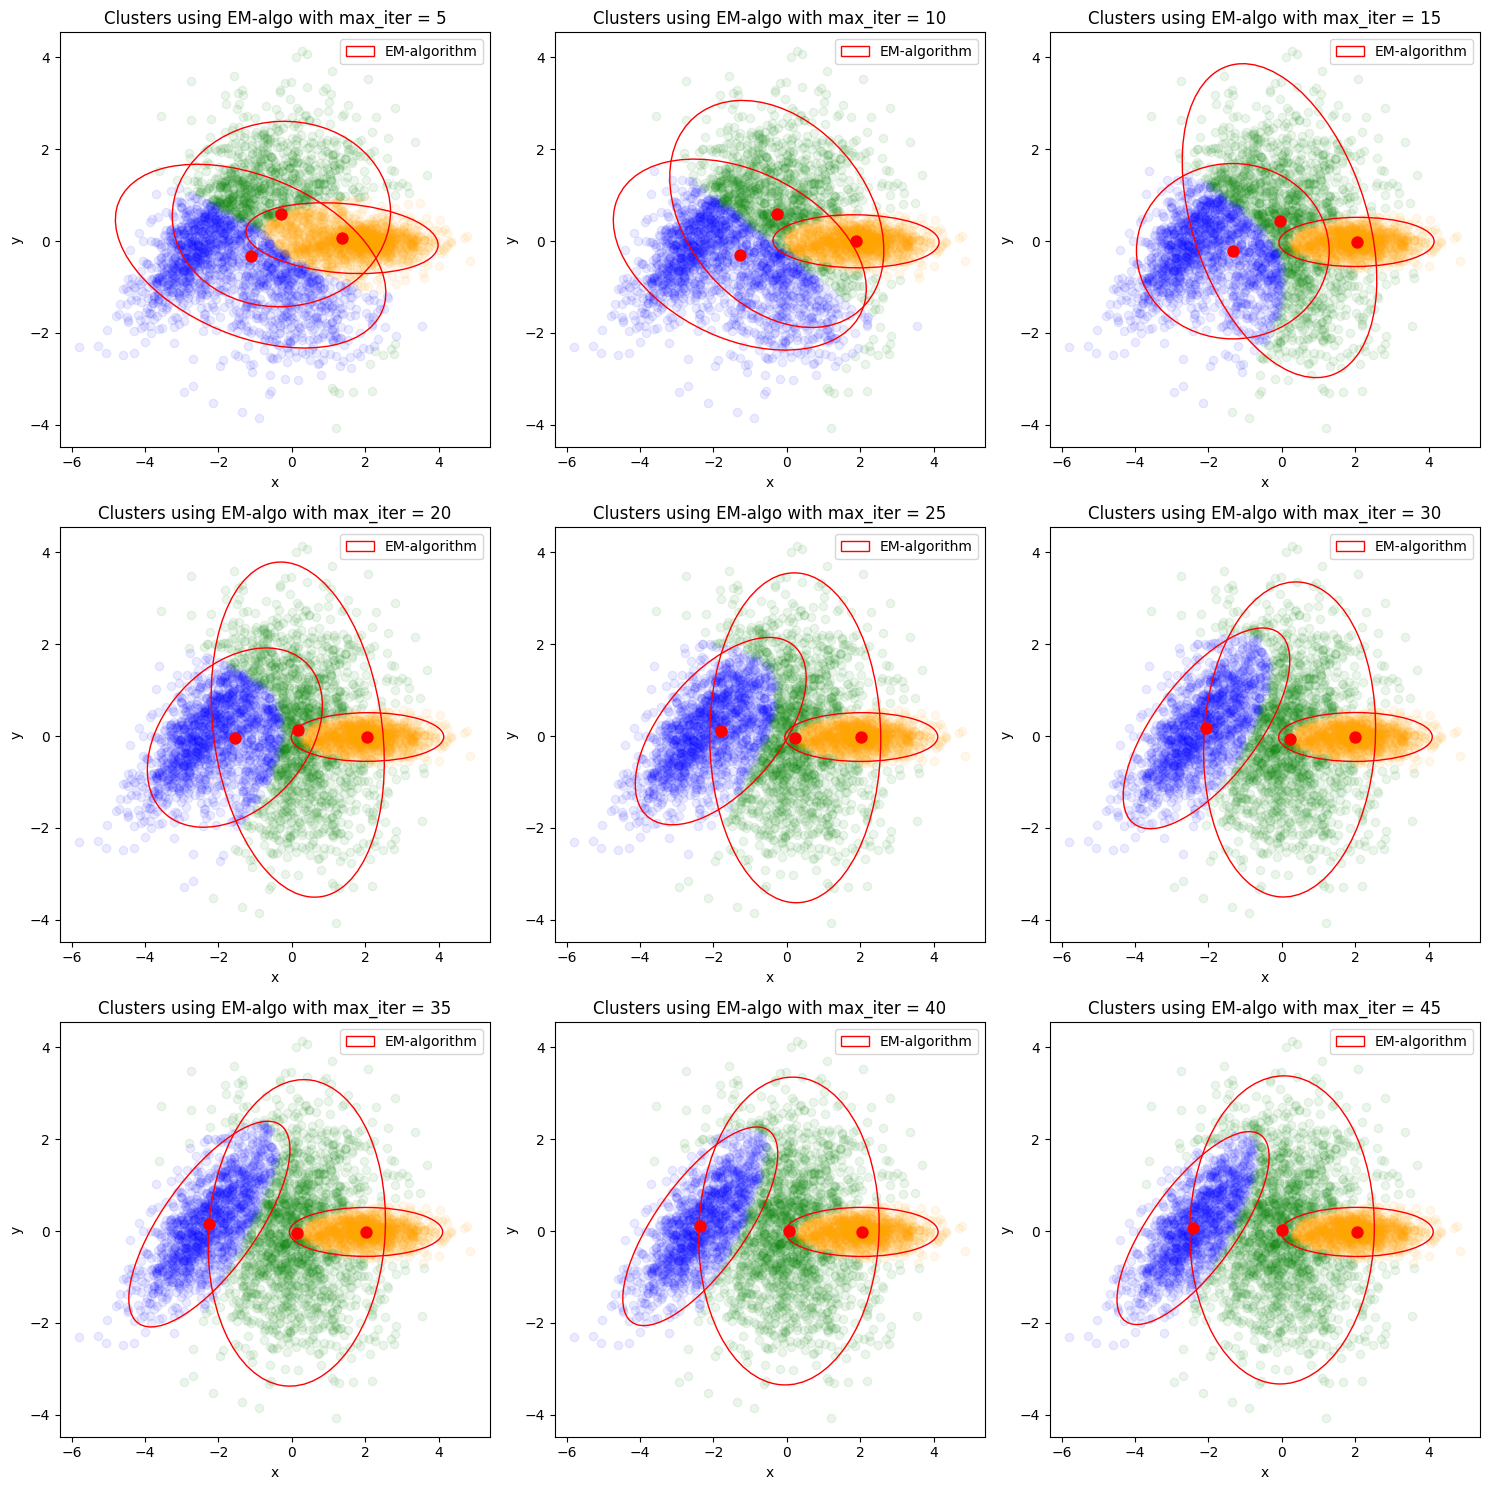

In [ ]:
# Создание общего графика с 3x3 subplot'ами
n_clusters = 3
plt.figure(figsize=(15, 15))
for i in range(1, 10):
    plot_em_only(data, i, n_clusters, lr = 0.0001)
plt.tight_layout()
plt.show()

**Сравнение EM-алгоритма и KMeans(изолинии)**

In [ ]:
def plot_em(data, iter, n, lr):
    X = data
    data_np = data.numpy()
    n_clusters = 3
    means, covariances, weights, like = em_clustering(data_np, n_clusters, max_iter = iter * 5, tol = lr)
    classes = []
    for f,s,t in like:
      if (max(max(f,s),t) == f):
        classes.append(0)
      elif (max(max(f,s),t) == s):
        classes.append(1)
      elif (max(max(f,s),t) == t):
        classes.append(2)

    labels = classes
    centre = means
    plt.subplot(3,3,iter)
    # plt.scatter(data[:,0], data[:,1], c=labels, cmap='Paired', alpha=0.08)
    for i, label in enumerate(labels):
      if label == 0:
        plt.scatter(data[i][0], data[i][1], c='green', alpha=0.08)
      elif label == 1:
        plt.scatter(data[i][0], data[i][1], c='orange', alpha=0.08)
      else:
        plt.scatter(data[i][0], data[i][1], c='blue', alpha=0.08)
    # plt.scatter(centre[:, 0], centre[:, 1], c = 'black', alpha = 0.4)
    # plt.scatter(centre_before[:, 0], centre_before[:, 1], c = 'black', alpha = 0.4)

    y_kmeans = np.array(labels)

    centers = means
    for i, cluster_center in enumerate(centers):
        plt.scatter(cluster_center[0], cluster_center[1], c='red', marker='.', s=250, alpha = 1)
        covariance_matrix = np.cov(X[y_kmeans==i].T)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * 180 / np.pi
        width, height = 2 * np.sqrt(5.991 * eigenvalues)  # 95% confidence interval (chi-squared distribution)
        if i == 0:
          ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=1, edgecolor='red', facecolor='none',label='EM-algorithm')
        else:
          ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=1, edgecolor='red', facecolor='none')
        plt.gca().add_patch(ellipse)

    #############################################################################################
    data_np = data.numpy()
    n_clusters = n
    kmeans_2 = cluster.KMeans(n_clusters=n_clusters, n_init = 1, max_iter = iter, tol = lr, random_state=42)
    kmeans_before = cluster.KMeans(n_clusters=n_clusters, n_init = 1, tol = lr, random_state=42)
    kmeans_before.fit(data_np)
    centre_before = kmeans_before.cluster_centers_

    kmeans_2.fit(data_np)

    labels = kmeans_2.labels_
    centre = kmeans_2.cluster_centers_

    y_kmeans = labels

    centers = kmeans_2.cluster_centers_
    for i, cluster_center in enumerate(centers):
        plt.scatter(cluster_center[0], cluster_center[1], c='purple', marker='.', s=250, alpha = 1)
        covariance_matrix = np.cov(X[y_kmeans==i].T)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * 180 / np.pi
        width, height = 2 * np.sqrt(5.991 * eigenvalues)  # 95% confidence interval (chi-squared distribution)
        if i == 0:
          ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=1, edgecolor='purple', facecolor='none', label = 'KMeans')
        else:
          ellipse = Ellipse(xy=cluster_center, width=width, height=height, angle=angle, alpha=1, edgecolor='purple', facecolor='none')
        plt.gca().add_patch(ellipse)
    #############################################################################################

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Clusters using EM-algo with max_iter = {}'.format(iter * 5))
    return kmeans

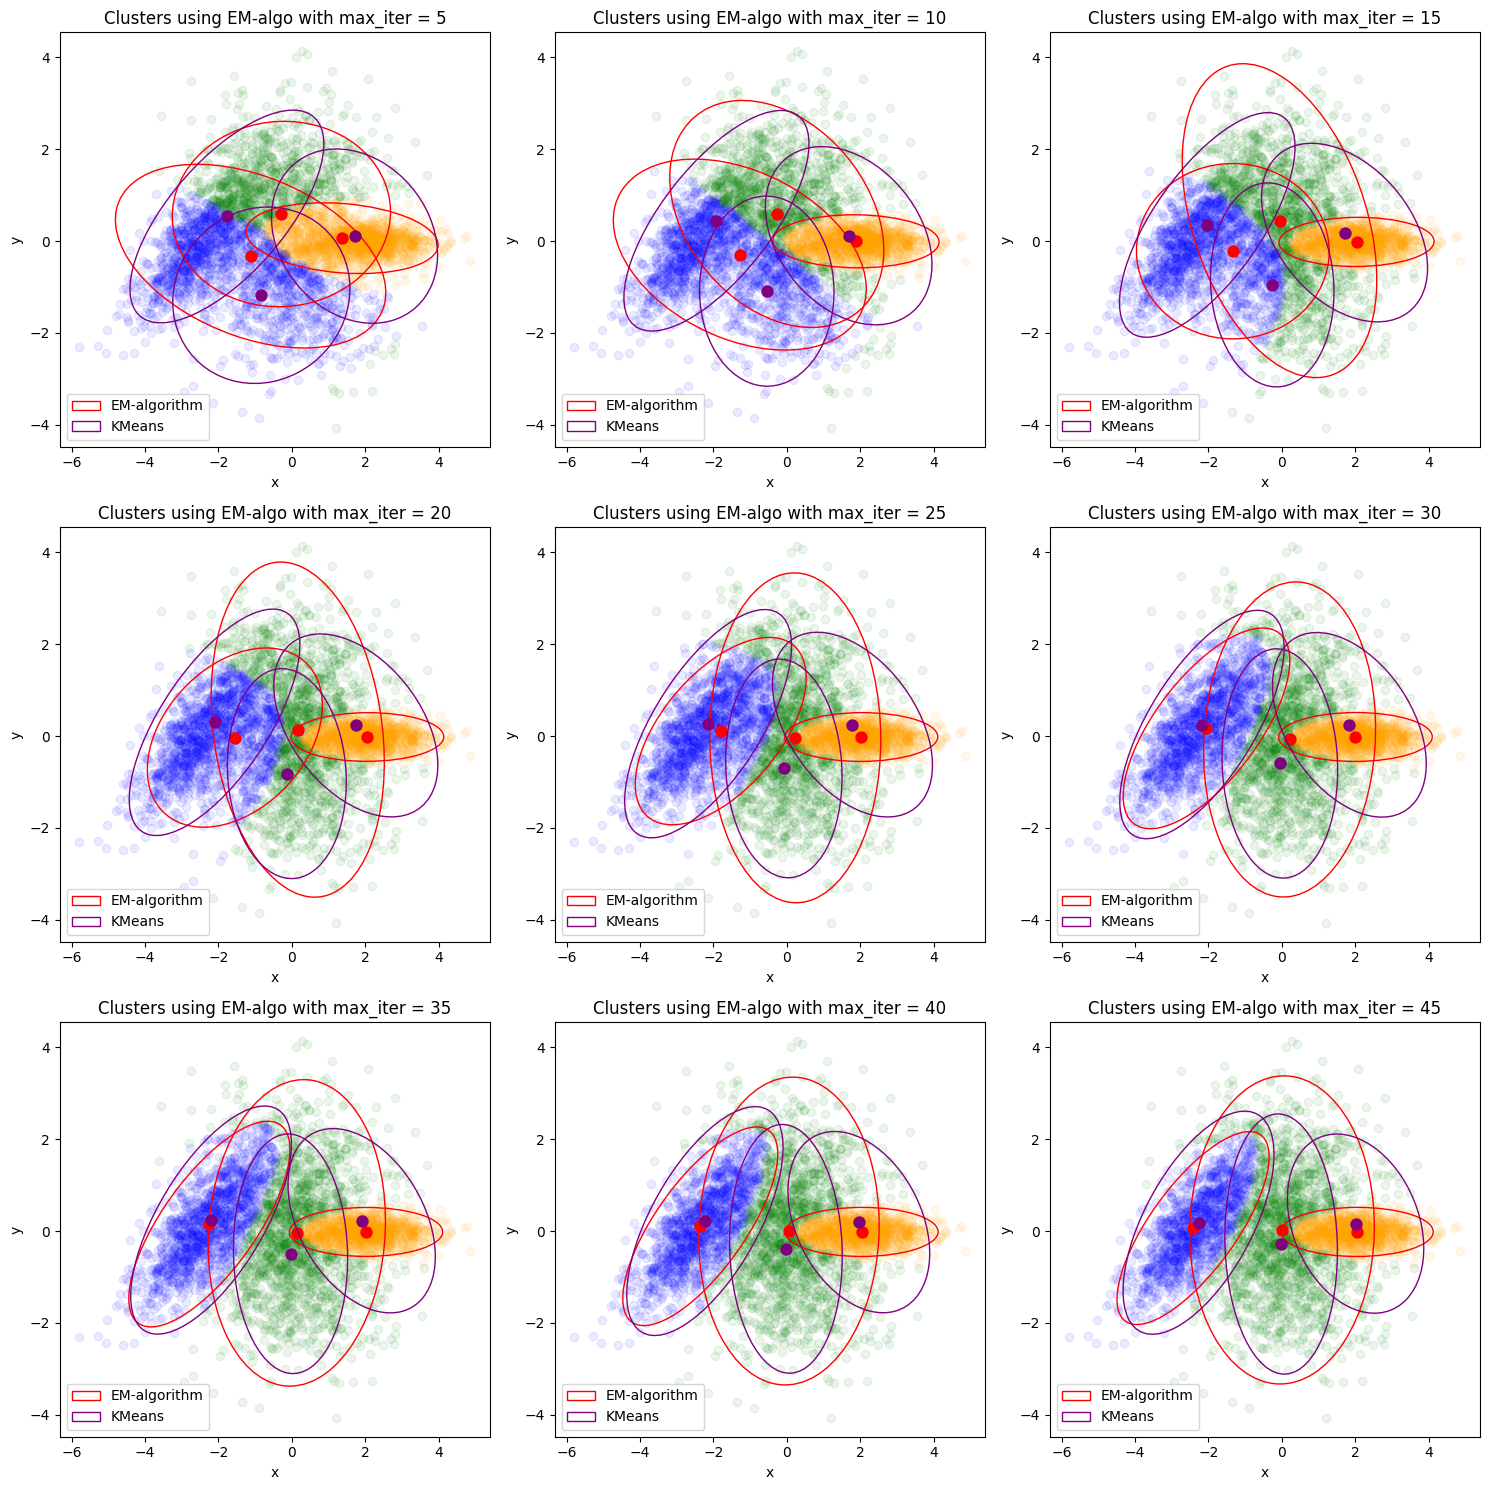

In [ ]:
# Создание общего графика с 3x3 subplot'ами
n_clusters = 3
plt.figure(figsize=(15, 15))
for i in range(1, 10):
    plot_em(data, i, n_clusters, lr = 0.0001)
plt.tight_layout()
plt.show()

**Модификация**

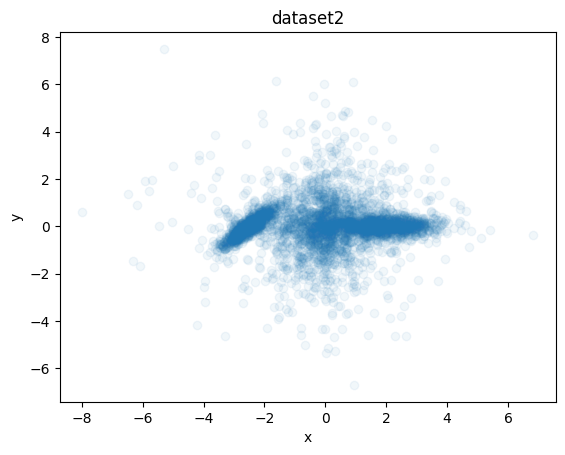

In [14]:

# Загрузка данных из файла
data_2 = torch.load('/content/drive/MyDrive/data/EM_test_data2.pt')

# Разделение данных на координаты x и y
x = data_2[:, 0]
y = data_2[:, 1]

# Построение графика точек
plt.scatter(x, y, alpha = 0.06)
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset2')
plt.show()


**Видно 2 четких маленьких скопления и одно большое - 2 нормальных и 1 лапласовское распределение**

In [86]:
data_np2 = data_2.numpy()

In [26]:
import numpy as np
from scipy.stats import multivariate_normal

def laplace_pdf(x, y, mu_x, mu_y, scale):
    return np.exp(-np.abs(x - mu_x) / scale - np.abs(y - mu_y) / scale) / (2 * scale**2)

def em_algorithm_mody(X, num_components, num_iterations):
    n, d = X.shape
    # Initialize parameters
    np.random.seed(42)
    means = np.random.rand(num_components, d)
    covariances = [np.eye(d) for _ in range(num_components)]
    weights = np.ones(num_components) / num_components
    scales = np.ones(num_components)  # Initialize scales

    for _ in range(num_iterations):
        # E-step
        probs = np.zeros((n, num_components))
        for i in range(num_components):
            if i < num_components - 1:
                probs[:, i] = weights[i] * (
                    multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
                )
            else:
                probs[:, i] = weights[i] * laplace_pdf(X[:, 0], X[:, 1], means[i][0], means[i][1], scales[i])
        probs_2 = probs / probs.sum(axis=1)[:, np.newaxis]
        probs = probs_2

        # M-step
        for i in range(num_components):
            weights[i] = np.sum(probs[:, i]) / n
            means[i] = np.sum(X * probs[:, i][:, np.newaxis], axis=0) / np.sum(probs[:, i])
            diff = X - means[i]
            covariances[i] = np.dot(diff.T, diff * probs[:, i][:, np.newaxis]) / np.sum(probs[:, i])
            if i == num_components - 1:
                scales[i] = np.sum(np.abs((X - means[i])) * probs[:, i][:, np.newaxis]) / np.sum(probs[:, i])

    return means, covariances, weights, scales, probs


**Посмотрим на нашу реализацию**

In [51]:
num_components = 3
num_iterations = 700

means, covariances, weights, scales, probs = em_algorithm_mody(data_2.numpy(), num_components, num_iterations)

print("Means:")
print(means)
print("Covariances:")
print(covariances)
print("Weights:")
print(weights)

classes = []
for f,s,t in probs:
  if (max(max(f * weights[0],s * weights[1]),t * weights[2]) == f  * weights[0]):
    classes.append(0)
  elif (max(max(f * weights[0],s * weights[1]),t * weights[2]) == s * weights[1]):
    classes.append(1)
  elif (max(max(f * weights[0],s * weights[1]),t * weights[2]) == t * weights[2]):
    classes.append(2)


Means:
[[-2.52941046 -0.02200241]
 [ 1.57883643  0.00421219]
 [-0.06300514  0.02744733]]
Covariances:
[array([[0.15981623, 0.13916353],
       [0.13916353, 0.1554365 ]]), array([[1.10451514, 0.00336441],
       [0.00336441, 0.0507375 ]]), array([[2.47107837, 0.04466325],
       [0.04466325, 1.98587391]])]
Weights:
[0.2323459  0.27953712 0.48811698]


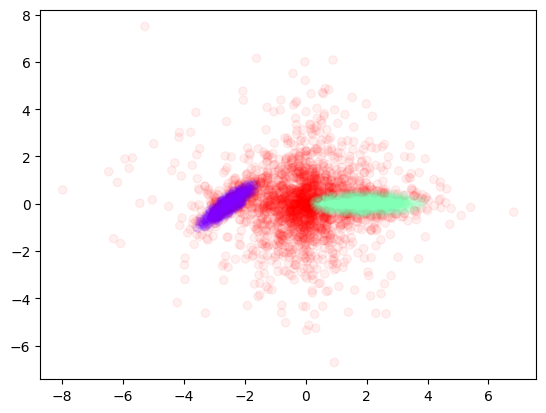

In [52]:
x = data_2.numpy()[:, 0]
y = data_2.numpy()[:, 1]

# Построение графика точек
plt.scatter(x, y, c = classes, cmap = 'rainbow', alpha = 0.06)

**Результат совпал с парвильным ответом и визуальным ожиданием!**

Стоило ли вообще делать модификацию?

может быть все бы поулчилось и без нее -> посмотрим на это:

**Обычный EM-алгоритм к 2-ому датасету**

In [53]:
n_clusters = 3
means_em, covariances, weights, probs = em_clustering(data_2.numpy(), n_clusters)
print("Cluster means:", means)

classes_em = []
for f,s,t in probs:
  if (max(max(f * weights[0],s * weights[1]),t * weights[2]) == f  * weights[0]):
    classes_em.append(0)
  elif (max(max(f * weights[0],s * weights[1]),t * weights[2]) == s * weights[1]):
    classes_em.append(1)
  elif (max(max(f * weights[0],s * weights[1]),t * weights[2]) == t * weights[2]):
    classes_em.append(2)

Cluster means: [[-2.52941046 -0.02200241]
 [ 1.57883643  0.00421219]
 [-0.06300514  0.02744733]]


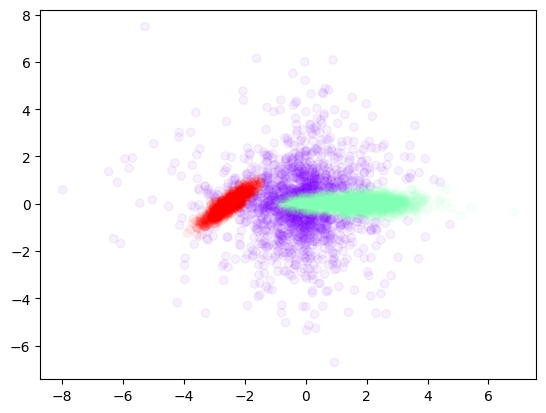

In [54]:
x = data_2.numpy()[:, 0]
y = data_2.numpy()[:, 1]

# Построение графика точек
plt.scatter(x, y, c = classes_em, cmap = 'rainbow', alpha = 0.06)

Видно 'наезд' на 0, в отличии от модификации, часть салатового распределения забирает фиолетовое, что в общем то неправильно(из визуального ожидания и правильного ответа)

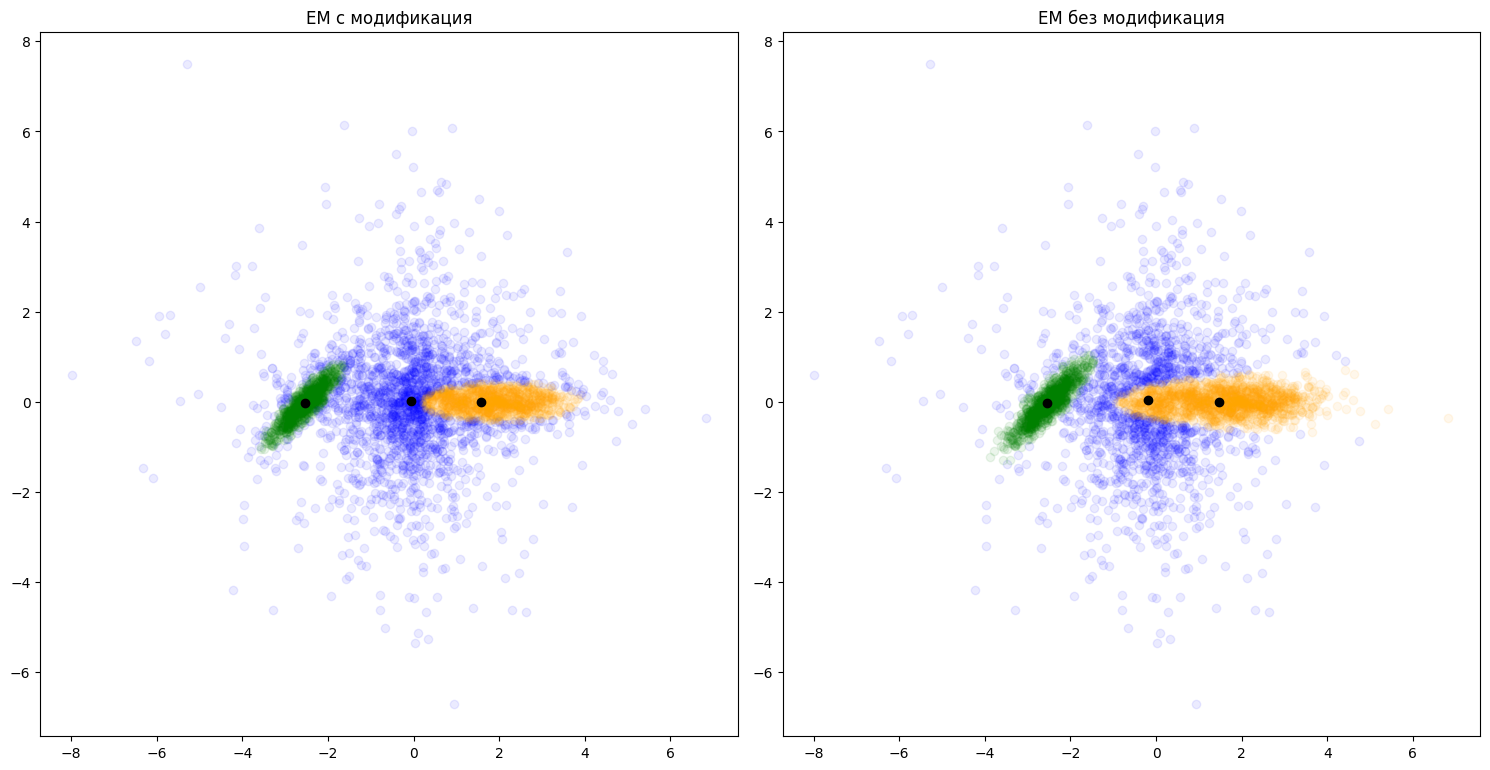

In [57]:
n_clusters = 3
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
# plt.scatter(x, y, c = classes, cmap = 'rainbow', alpha = 0.06)
for i, label in enumerate(classes):
      if label == 0:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='green', alpha=0.08)
      elif label == 1:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='orange', alpha=0.08)
      else:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='blue', alpha=0.08)

plt.scatter(means[:, 0], means[:, 1], color = 'black')
plt.title('EM с модификация')
plt.subplot(2,2,2)
# plt.scatter(x, y, c = classes_em, cmap = 'rainbow', alpha = 0.06)
for i, label in enumerate(classes_em):
      if label == 0:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='blue', alpha=0.08)
      elif label == 1:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='orange', alpha=0.08)
      else:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='green', alpha=0.08)
plt.scatter(means_em[:, 0], means_em[:, 1], color = 'black')
plt.title('EM без модификация')
plt.tight_layout()
plt.show()

Однако, алгоритм хорошо угадал зеленое разбиение - это из-за возможного бОльшего расстояния от оранжевого кластера

~А вдруг?~

**Сравним EM-алгоритм с модификацией и KMeans**

In [63]:
# Количество кластеров
n_clusters = 3

# Создание и обучение модели kMeans
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state = 30, tol = 10e-10)
kmeans.fit(data_2.numpy())

# Получение меток кластеров
labels = kmeans.labels_
centre = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


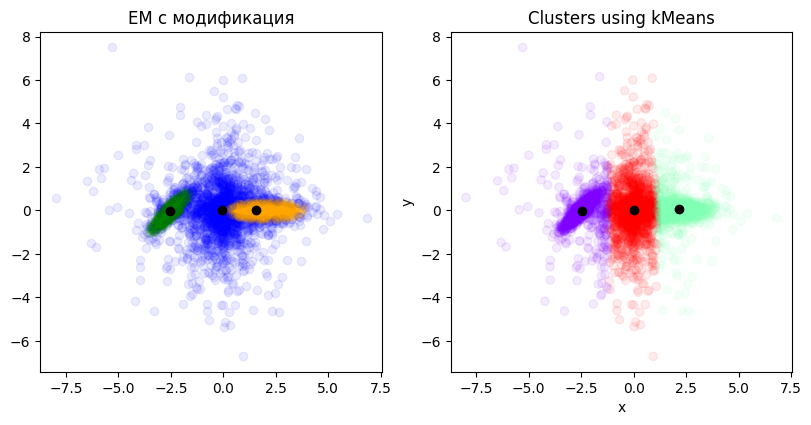

<Figure size 640x480 with 0 Axes>

In [93]:
n_clusters = 3
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
# plt.scatter(x, y, c = classes, cmap = 'rainbow', alpha = 0.06)
for i, label in enumerate(classes):
      if label == 0:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='green', alpha=0.08)
      elif label == 1:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='orange', alpha=0.08)
      else:
        plt.scatter(data_2.numpy()[i][0], data_2.numpy()[i][1], c='blue', alpha=0.08)
plt.scatter(means[:, 0], means[:, 1], color = 'black')
plt.title('EM с модификация')

plt.subplot(3,3,2)
plt.scatter(data_2.numpy()[:, 0], data_2.numpy()[:, 1], c=labels, cmap='rainbow', alpha = 0.08)
plt.scatter(centre[:, 0], centre[:, 1], c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters using kMeans')
plt.show()
plt.tight_layout()
plt.show()

Очевидно слишком простой KMeans не справился с относительно трудной задачей